## 5: Linear Regression and Train/Test Split

Use the `2013_movies.csv` data set:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from dateutil import parser
from datetime import datetime

import patsy
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

/home/cneiderer/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
pd.set_option('display.height', 1000)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

%matplotlib inline
sns.set_style('darkgrid')

## Load and Inspect Data

In [3]:
df = pd.read_csv('./challenges_data/2013_movies.csv')

In [4]:
df.describe()

,Budget,DomesticTotalGross,Runtime
count,8.900000e+01,1.000000e+02,100.000000
mean,7.474719e+07,1.005969e+08,112.260000
std,5.941692e+07,8.739641e+07,18.190696
min,2.500000e+06,2.556825e+07,75.000000
25%,2.800000e+07,4.270413e+07,98.000000
50%,5.500000e+07,6.954237e+07,112.000000
75%,1.100000e+08,1.204759e+08,123.000000
max,2.250000e+08,4.246680e+08,180.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
Title                 100 non-null object
Budget                89 non-null float64
DomesticTotalGross    100 non-null int64
Director              96 non-null object
Rating                100 non-null object
Runtime               100 non-null int64
ReleaseDate           100 non-null object
dtypes: float64(1), int64(2), object(4)
memory usage: 5.5+ KB


In [6]:
# Look at head and tail
pd.concat([df.head(), df.tail()], axis=0)

,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate
0,The Hunger Games: Catching Fire,130000000.0,424668047,Francis Lawrence,PG-13,146,2013-11-22 00:00:00
1,Iron Man 3,200000000.0,409013994,Shane Black,PG-13,129,2013-05-03 00:00:00
2,Frozen,150000000.0,400738009,Chris BuckJennifer Lee,PG,108,2013-11-22 00:00:00
3,Despicable Me 2,76000000.0,368061265,Pierre CoffinChris Renaud,PG,98,2013-07-03 00:00:00
4,Man of Steel,225000000.0,291045518,Zack Snyder,PG-13,143,2013-06-14 00:00:00
95,Rush,38000000.0,26947624,Ron Howard,R,123,2013-09-20 00:00:00
96,The Host,40000000.0,26627201,Andrew Niccol,PG-13,125,2013-03-29 00:00:00
97,The World's End,20000000.0,26004851,Edgar Wright,R,109,2013-08-23 00:00:00
98,21 and Over,13000000.0,25682380,Jon LucasScott Moore,R,93,2013-03-01 00:00:00
99,Her,23000000.0,25568251,Spike Jonze,R,120,2013-12-18 00:00:00


In [7]:
# Look at random sample
df.sample(5)

,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate
21,The Wolverine,120000000.0,132556852,James Mangold,PG-13,126,2013-07-26 00:00:00
44,2 Guns,61000000.0,75612460,Baltasar Kormakur,R,109,2013-08-02 00:00:00
97,The World's End,20000000.0,26004851,Edgar Wright,R,109,2013-08-23 00:00:00
43,Turbo,135000000.0,83028128,David Soren,PG,96,2013-07-17 00:00:00
57,Prisoners,46000000.0,61002302,Denis Villeneuve,R,146,2013-09-20 00:00:00


### Remove Null Rows

In [8]:
df = df[~df.isnull().any(axis=1)]

### Transform Date into Month and Year

In [9]:
df['Date'] = df['ReleaseDate'].map(lambda x: parser.parse(x))

In [10]:
df['Year'] = df['Date'].map(lambda x: x.year)
df['Month'] = df['Date'].map(lambda x: x.month)

## Challenge 1

Build a linear model that uses only a constant term (a column of ones) to predict a continuous outcome (like domestic total gross). How can you interpret the results of this model? What does it predict? Make a plot of predictions against actual outcome. Make a histogram of residuals. How are the residuals distributed?

In [11]:
# Create your feature matrix (X) and target vector (y)
y, X = patsy.dmatrices('DomesticTotalGross ~ 1', data=df, return_type='dataframe')

In [12]:
X.head()

,Intercept
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0


In [13]:
y.head()

,DomesticTotalGross
0,424668047.0
1,409013994.0
2,400738009.0
3,368061265.0
4,291045518.0


### statsmodels

In [14]:
# Create your model
model = sm.OLS(y, X)
# Fit your model to your training set
fit = model.fit()
# Print summary statistics of the model's performance
fit.summary()

/home/cneiderer/anaconda3/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1396: RuntimeWarning: divide by zero encountered in double_scalars
  return self.ess/self.df_model


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     DomesticTotalGross   R-squared:                      -0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                      -inf
Date:                Tue, 30 Jan 2018   Prob (F-statistic):                nan
Time:                        17:52:54   Log-Likelihood:                -1714.4
No. Observations:                  87   AIC:                             3431.
Df Residuals:                      86   BIC:                             3433.
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.035e+08   9.43e+06     10.975      0.000    8.48e+07    1.22e+08
==============================================================================
Omnibus:                       47.828   Durbin-Watson:                   0.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              119.528
Skew:                           2.032   Prob(JB):                     1.11e-26
Kurtosis:                       7.058   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### sklearn

In [15]:
# Create an empty model
lr = LinearRegression()
# Fit the model to the full dataset
lr.fit(X, y)
# Print out the R^2 for the model against the full dataset
lr.score(X,y)

0.0

## Challenge 2

Repeat the process of challenge one, but also add one continuous (numeric) predictor variable. Also add plots of model prediction against your feature variable and residuals against feature variable. How can you interpret what's happening in the model?

In [16]:
# Create your feature matrix (X) and target vector (y)
y, X = patsy.dmatrices('DomesticTotalGross ~ Budget', data=df, return_type='dataframe')

In [17]:
X.head()

,Intercept,Budget
0,1.0,130000000.0
1,1.0,200000000.0
2,1.0,150000000.0
3,1.0,76000000.0
4,1.0,225000000.0


In [18]:
y.head()

,DomesticTotalGross
0,424668047.0
1,409013994.0
2,400738009.0
3,368061265.0
4,291045518.0


### statsmodels

In [19]:
# Create your model
model = sm.OLS(y, X)
# Fit your model to your training set
fit = model.fit()
# Print summary statistics of the model's performance
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     DomesticTotalGross   R-squared:                       0.282
Model:                            OLS   Adj. R-squared:                  0.274
Method:                 Least Squares   F-statistic:                     33.43
Date:                Tue, 30 Jan 2018   Prob (F-statistic):           1.19e-07
Time:                        17:52:54   Log-Likelihood:                -1700.0
No. Observations:                  87   AIC:                             3404.
Df Residuals:                      85   BIC:                             3409.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.443e+07    1.3e+07      3.418      0.001    1.86e+07    7.03e+07
Budget         0.7831      0.135      5.782      0.000       0.514       1.052
==============================================================================
Omnibus:                       38.475   Durbin-Watson:                   0.666
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               92.671
Skew:                           1.577   Prob(JB):                     7.53e-21
Kurtosis:                       6.952   Cond. No.                     1.55e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.55e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### sklearn

In [20]:
# Create an empty model
lr = LinearRegression()
# Fit the model to the full dataset
lr.fit(X, y)
# Print out the R^2 for the model against the full dataset
lr.score(X,y)

0.28230037692954857

## Challenge 3

Repeat the process of challenge 1, but add a categorical feature (like genre). You'll have to convert a column of text into a number of numerical columns ("dummy variables"). How can you interpret what's happening in the model?

In [21]:
# Create your feature matrix (X) and target vector (y)
rating = patsy.dmatrix('Rating', data=df, return_type='dataframe')
y = df[['DomesticTotalGross']]
X = df[['Budget', 'Runtime']].join(rating)

In [22]:
X.head()

,Budget,Runtime,Intercept,Rating[T.PG-13],Rating[T.R]
0,130000000.0,146,1.0,1.0,0.0
1,200000000.0,129,1.0,1.0,0.0
2,150000000.0,108,1.0,0.0,0.0
3,76000000.0,98,1.0,0.0,0.0
4,225000000.0,143,1.0,1.0,0.0


In [23]:
y.head()

,DomesticTotalGross
0,424668047
1,409013994
2,400738009
3,368061265
4,291045518


### statsmodels

In [24]:
# Create your model
model = sm.OLS(y, X)
# Fit your model to your training set
fit = model.fit()
# Print summary statistics of the model's performance
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     DomesticTotalGross   R-squared:                       0.299
Model:                            OLS   Adj. R-squared:                  0.264
Method:                 Least Squares   F-statistic:                     8.730
Date:                Tue, 30 Jan 2018   Prob (F-statistic):           6.38e-06
Time:                        17:52:55   Log-Likelihood:                -1699.0
No. Observations:                  87   AIC:                             3408.
Df Residuals:                      82   BIC:                             3420.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Budget              0.6957      0.172      4.054      0.000       0.354       1.037
Runtime          6.254e+05   5.33e+05      1.173      0.244   -4.35e+05    1.69e+06
Intercept         3.09e+06   5.29e+07      0.058      0.954   -1.02e+08    1.08e+08
Rating[T.PG-13] -2.747e+07    2.5e+07     -1.097      0.276   -7.73e+07    2.24e+07
Rating[T.R]      -2.59e+07   2.76e+07     -0.939      0.351   -8.08e+07     2.9e+07
==============================================================================
Omnibus:                       35.472   Durbin-Watson:                   0.733
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               76.021
Skew:                           1.509   Prob(JB):                     3.11e-17
Kurtosis:                       6.445   Cond. No.                     6.28e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.28e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### sklearn

In [25]:
# Create an empty model
lr = LinearRegression()
# Fit the model to the full dataset
lr.fit(X, y)
# Print out the R^2 for the model against the full dataset
lr.score(X,y)

0.29867705443266701

## Challenge 4

Enhance your model further by adding more features and/or transforming existing features. Think about how you build the model matrix and how to interpret what the model is doing.

In [26]:
# Create your feature matrix (X) and target vector (y)
director = patsy.dmatrix('Director', data=df, return_type='dataframe')
rating = patsy.dmatrix('Rating', data=df, return_type='dataframe')

In [27]:
y = df[['DomesticTotalGross']]
X = pd.concat([df[['Budget', 'Year', 'Month']], rating], axis=1)

### statsmodels

In [28]:
# Create your model
model = sm.OLS(y, X)
# Fit your model to your training set
fit = model.fit()
# Print summary statistics of the model's performance
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     DomesticTotalGross   R-squared:                       0.291
Model:                            OLS   Adj. R-squared:                  0.256
Method:                 Least Squares   F-statistic:                     8.409
Date:                Tue, 30 Jan 2018   Prob (F-statistic):           9.80e-06
Time:                        17:52:55   Log-Likelihood:                -1699.4
No. Observations:                  87   AIC:                             3409.
Df Residuals:                      82   BIC:                             3421.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Budget              0.7922      0.157      5.033      0.000       0.479       1.105
Year             2.199e+04   1.59e+04      1.381      0.171   -9696.891    5.37e+04
Month            1.665e+06   2.46e+06      0.677      0.500   -3.23e+06    6.56e+06
Intercept          10.9234      7.913      1.381      0.171      -4.817      26.664
Rating[T.PG-13] -1.648e+07   2.36e+07     -0.699      0.487   -6.34e+07    3.04e+07
Rating[T.R]     -1.243e+07   2.58e+07     -0.481      0.632   -6.38e+07     3.9e+07
==============================================================================
Omnibus:                       34.219   Durbin-Watson:                   0.683
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               73.173
Skew:                           1.449   Prob(JB):                     1.29e-16
Kurtosis:                       6.433   Cond. No.                     3.72e+23
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.81e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

### sklearn

In [29]:
# Create an empty model
lr = LinearRegression()
# Fit the model to the full dataset
lr.fit(X, y)
# Print out the R^2 for the model against the full dataset
lr.score(X, y)

0.29086740172151471

## Challenge 5

Fitting and checking predictions on the exact same data set can be
misleading. Divide your data into two sets: a training and a test set
(roughly 75% training, 25% test is a fine split). Fit a model on the
training set, check the predictions (by plotting versus actual values)
in the test set.

In [30]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=129)

### statsmodels

In [31]:
# Create your model
model = sm.OLS(y_train, X_train)
# Fit your model to your training set
fit = model.fit()
# Print summary statistics of the model's performance
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     DomesticTotalGross   R-squared:                       0.363
Model:                            OLS   Adj. R-squared:                  0.316
Method:                 Least Squares   F-statistic:                     7.827
Date:                Tue, 30 Jan 2018   Prob (F-statistic):           4.56e-05
Time:                        17:52:55   Log-Likelihood:                -1159.8
No. Observations:                  60   AIC:                             2330.
Df Residuals:                      55   BIC:                             2340.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Budget              0.8357      0.164      5.094      0.000       0.507       1.164
Year            -1.244e+04   1.89e+04     -0.657      0.514   -5.04e+04    2.55e+04
Month            4.801e+06   2.95e+06      1.627      0.110   -1.11e+06    1.07e+07
Intercept          -6.1812      9.410     -0.657      0.514     -25.040      12.678
Rating[T.PG-13]   3.07e+07   2.52e+07      1.220      0.228   -1.97e+07    8.11e+07
Rating[T.R]      3.781e+07   2.75e+07      1.376      0.174   -1.73e+07    9.29e+07
==============================================================================
Omnibus:                       26.317   Durbin-Watson:                   2.023
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               57.931
Skew:                           1.334   Prob(JB):                     2.63e-13
Kurtosis:                       7.007   Cond. No.                     5.27e+23
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.91e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

/home/cneiderer/anaconda3/lib/python3.6/site-packages/pandas/core/indexes/base.py:3140: RuntimeWarning: '<' not supported between instances of 'str' and 'int', sort order is undefined for incomparable objects
  return this.join(other, how=how, return_indexers=return_indexers)


Text(0.5,1,'Predicted vs. Actual')

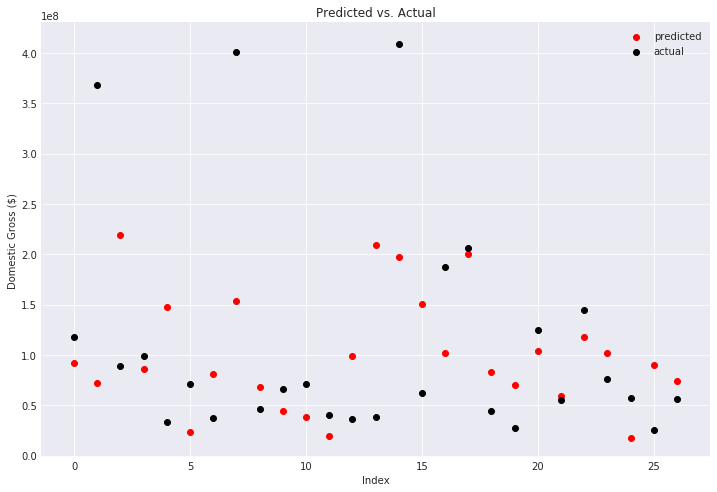

In [32]:
# Plot Actual vs. Predicted
y_pred = fit.predict(X_test)
y_error = y_pred - y_test

fig = plt.figure(figsize=(12, 8))
plt.scatter(np.arange(len(y_pred)), y_pred, color='red', label='predicted')
plt.scatter(np.arange(len(y_test)), y_test.iloc[:, 0], color='black', label='actual')
plt.legend(loc='upper right')
plt.xlabel('Index')
plt.ylabel('Domestic Gross ($)')
plt.title('Predicted vs. Actual')

Text(0.5,1,'Model Residuals')

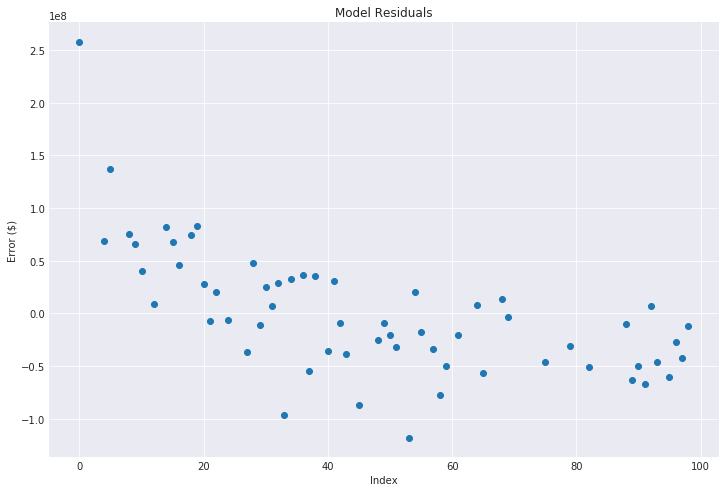

In [33]:
# Plot residuals
fit.resid.plot(style='o', figsize=(12,8));
plt.xlabel('Index')
plt.ylabel('Error ($)')
plt.title('Model Residuals')

### sklearn

In [34]:
lr = LinearRegression()
# Fit the model against the training data
lr.fit(X_train, y_train)
# Evaluate the model against the testing data
lr.score(X_train, y_train)

0.36275939507757415

/home/cneiderer/anaconda3/lib/python3.6/site-packages/pandas/core/indexes/base.py:3140: RuntimeWarning: '<' not supported between instances of 'str' and 'int', sort order is undefined for incomparable objects
  return this.join(other, how=how, return_indexers=return_indexers)


Text(0.5,1,'Predicted vs. Actual')

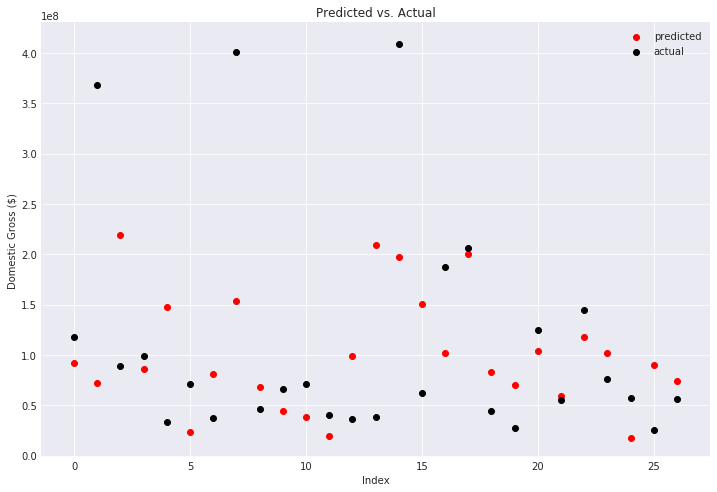

In [35]:
# Plot Actual vs. Predicted
y_pred = fit.predict(X_test)
y_error = y_pred - y_test

fig = plt.figure(figsize=(12, 8))
plt.scatter(np.arange(len(y_pred)), y_pred, color='red', label='predicted')
plt.scatter(np.arange(len(y_test)), y_test.iloc[:, 0], color='black', label='actual')
plt.legend(loc='upper right')
plt.xlabel('Index')
plt.ylabel('Domestic Gross ($)')
plt.title('Predicted vs. Actual')

Text(0.5,1,'Model Residuals')

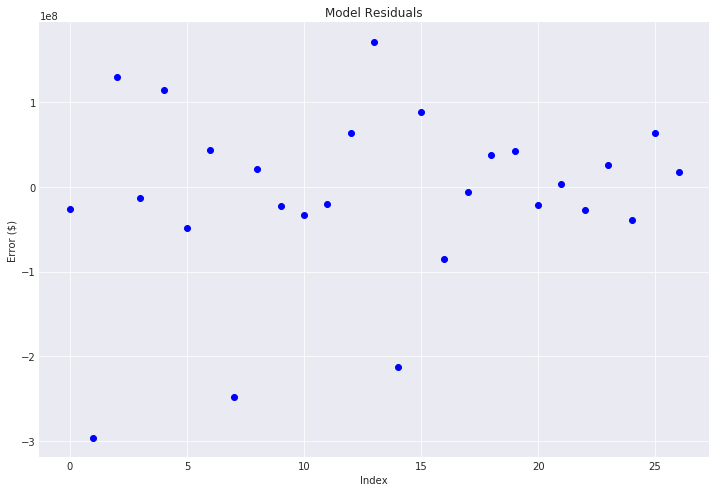

In [36]:
# Calculate and Residuals
y_pred = lr.predict(X_test)
y_error = y_pred - y_test

fig = plt.figure(figsize=(12, 8))
plt.scatter(np.arange(len(y_error)), y_error.iloc[:, 0], color='blue', label='residuals')
plt.xlabel('Index')
plt.ylabel('Error ($)')
plt.title('Model Residuals')